<a href="https://colab.research.google.com/github/askholani/PCVK_M_1/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

1. import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [22]:
# pytesseract : pustaka Python
# untuk mengenali teks dalam gambar (OCR - Optical Character Recognition).
# mengekstrak teks dari gambar atau dokumen gambar.
pip install pytesseract

SyntaxError: ignored

In [23]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

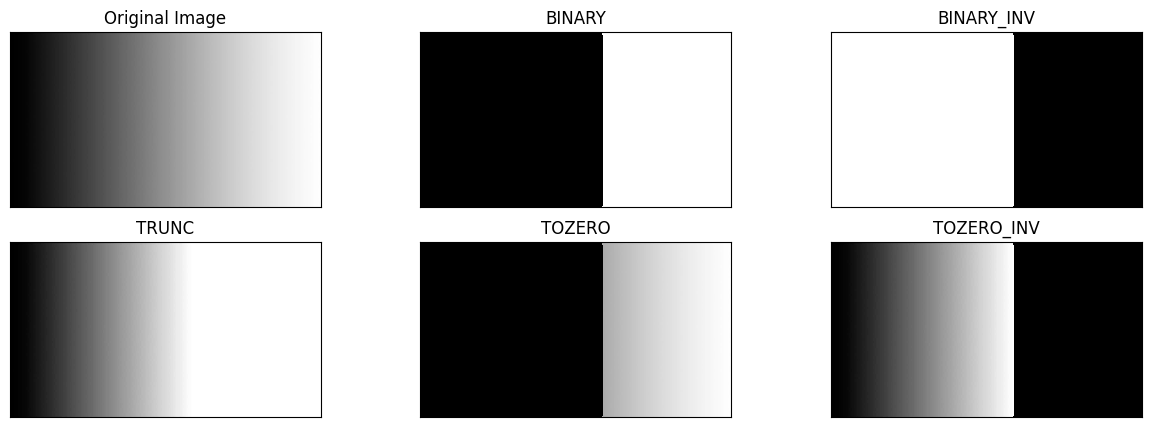

In [24]:
img = Image.open('/content/drive/MyDrive/content/Images/image_thres/gradient.jpg')

# mengonversi gambar ke mode skala abu-abu (grayscale).
# gambar hanya akan memiliki satu saluran warna (tingkat kecerahan) daripada tiga saluran (merah, hijau, biru) seperti gambar berwarna.
img = img.convert("L")

thresh = 170

loaded = img.load()

def thresholding(img, th):
  w, h = img.size
  pixels = img.load()

  th1 = Image.new("L", (w,h))
  th2 = Image.new("L", (w,h))
  th3 = Image.new("L", (w,h))
  th4 = Image.new("L", (w,h))
  th5 = Image.new("L", (w,h))

  pi1 = th1.load()
  pi2 = th2.load()
  pi3 = th3.load()
  pi4 = th4.load()
  pi5 = th5.load()

  for y in range(h):
    for x in range(w):
      if pixels[x,y] > th:
        pi1[x, y] = 255
        pi2[x, y] = 0
        pi3[x, y] = th
        pi4[x, y] = pixels[x,y]
        pi5[x, y] = 0
      else:
        pi1[x, y] = 0
        pi2[x, y] = 255
        pi3[x, y] = pixels[x,y]
        pi4[x, y] = 0
        pi5[x, y] = pixels[x,y]
  return th1, th2, th3, th4, th5

th1, th2, th3, th4, th5 = thresholding(img, thresh)

# Tampilkan gambar hasil thresholding
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
# interpolation='nearest': Parameter ini mengatur metode interpolasi yang digunakan untuk merender gambar.
# 'nearest' mengindikasikan bahwa setiap piksel dalam gambar akan dirender dengan cara mengambil nilai piksel terdekat.
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

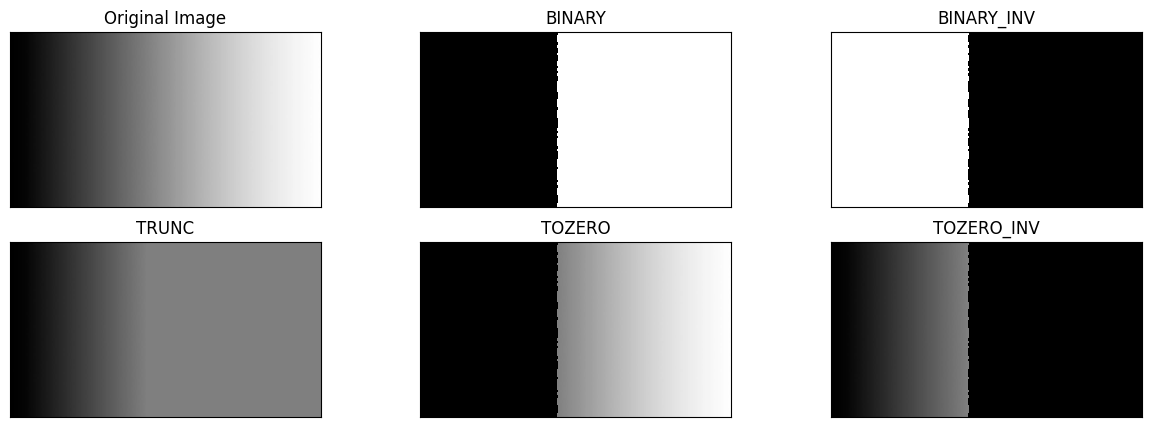

In [25]:
# Code Berikut menunjukkan penggunaan dari library OpenCV cv.Threshold

path = ('/content/drive/MyDrive/content/Images/image_thres/gradient.jpg')

img = cv2.imread(path)
thresh = 127 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)

#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)

#3. Threshold Truncate
# lebih besar dari thresh, maka nilainya akan ditruncate (dipangkas)
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)

#4. Threshold Tozero
# lebih rendah dari nilai thresh, maka nilai pixel barunya akan diubah menjadi 0
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)

#5. Threshold Tozero Inverse
# kebalikan threshold Tozero
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))

for i in range(len(images)):
 plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

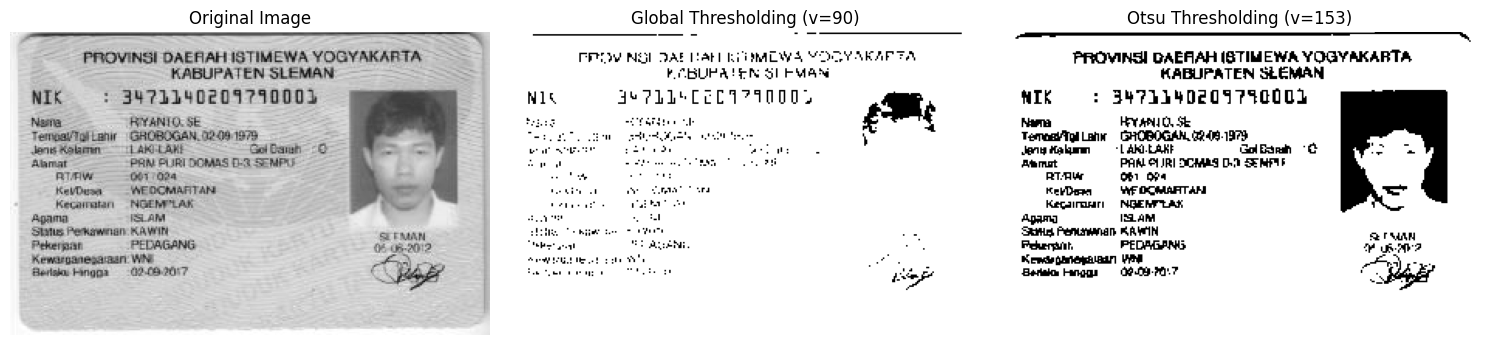

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# Fungsi Otsu's Thresholding
def otsu_thresholding(image):
    # Normalisasi histogram
    hist = np.histogram(image, bins=256, range=(0, 256))[0].astype(float)
    hist /= hist.sum()

    maximum = 0
    threshold = 0
    sum_b = 0
    sum_f = np.dot(np.arange(256), hist)
    for t in range(256):
        w_b = np.sum(hist[:t])
        w_f = 1 - w_b
        if w_b == 0 or w_f == 0:
            continue
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_f - sum_b) / w_f
        between_class_variance = w_b * w_f * (m_b - m_f) ** 2
        if between_class_variance > maximum:
            maximum = between_class_variance
            threshold = t

    return threshold

# Path file gambar
image_path = '/content/drive/MyDrive/content/Images/ktp.png'

# Baca gambar dari path
image = np.array(Image.open(image_path).convert("L"))

# Nilai threshold global
global_threshold_value = 90

# Nilai threshold Otsu
otsu_threshold_value = otsu_thresholding(image)

# Tampilkan gambar dan hasil thresholding
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Original Image', f'Global Thresholding (v={global_threshold_value})', f'Otsu Thresholding (v={otsu_threshold_value})']
images = [image, global_thresholding(image, global_threshold_value), global_thresholding(image, otsu_threshold_value)]

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencv-
tutorial.readthedocs.io/en/latest/histogram/histogram.html

  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

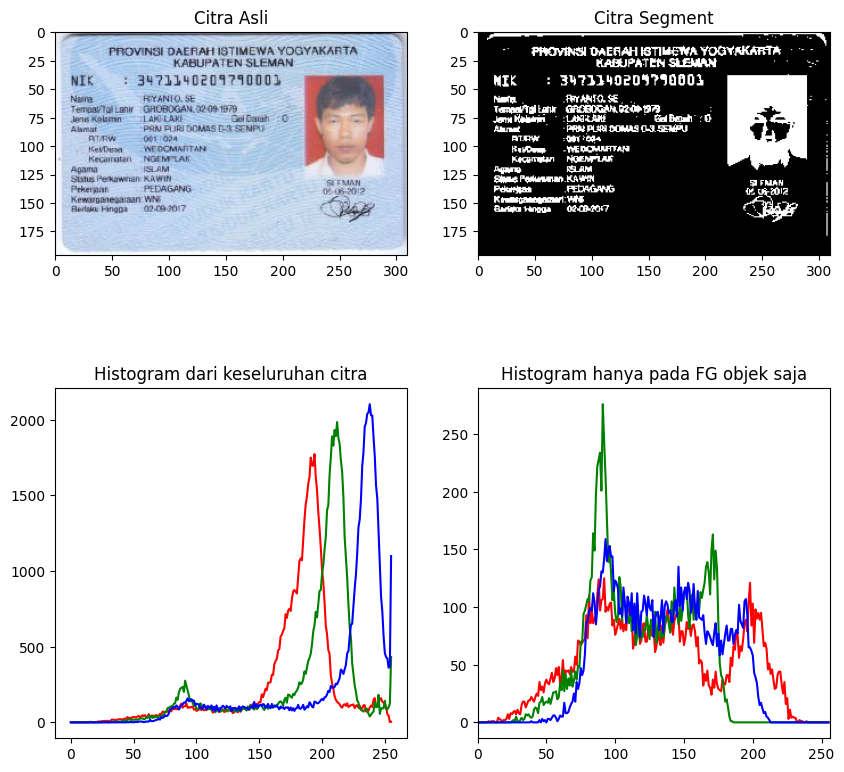

In [55]:
#a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

# image_path = '/content/drive/MyDrive/content/Images/ktp.png'
pict_3 = ('/content/drive/MyDrive/content/Images/ktp.png')

img_l = cv2.imread(pict_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

# 180:  nilai ambang (threshold value).
# Semua piksel dengan nilai di atas ambang ini akan diberi label sebagai objek,
# dan yang di bawah ambang ini akan diberi label sebagai latar belakang.
# 255: nilai maksimal yang akan diberikan pada piksel yang lebih terang (objek).

# mask : variabel menyimpan hasil operasi threshold
# berisi gambar biner yang akan digunakan untuk memisahkan objek dari latar belakang dalam gambar.
# Piksel yang mewakili objek memiliki nilai 255,
# piksel yang mewakili latar belakang memiliki nilai 0.

# ret3 : nilai ambang atau threshold
ret3,mask = cv2.threshold(img_gray,180,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')

    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

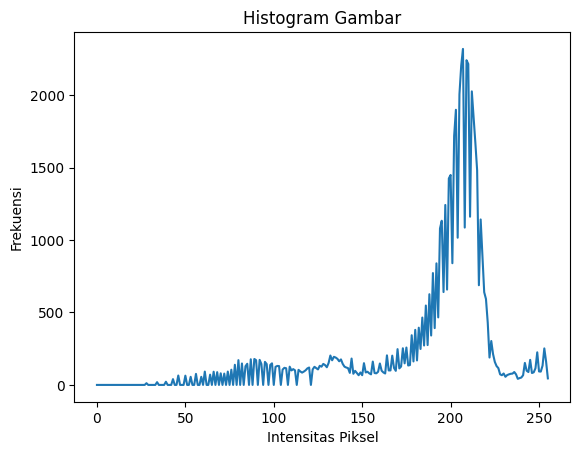

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('/content/drive/MyDrive/content/Images/ktp.png', 0)

# Hitung histogram gambar
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Tampilkan histogram
plt.plot(hist)
plt.title('Histogram Gambar')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

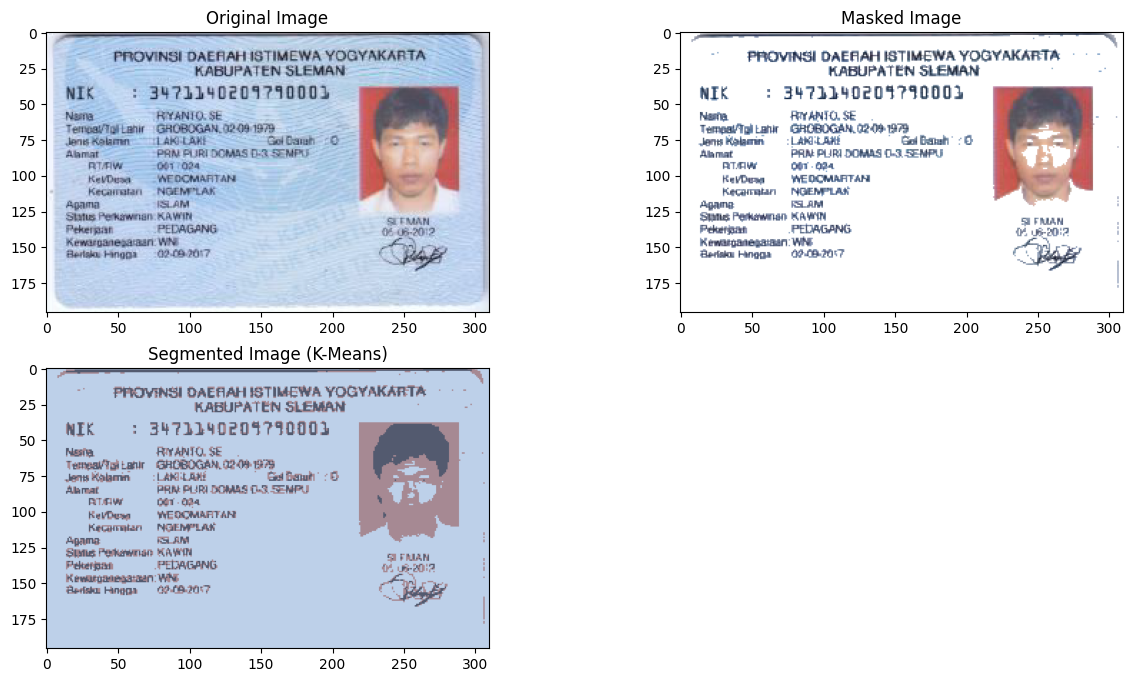

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
path = '/content/drive/MyDrive/content/Images/ktp.png'
ktp_img = cv2.imread(path)
ktp_img = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = ktp_img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(ktp_img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(ktp_img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(ktp_img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(ktp_img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali
tulisan.

In [ ]:
!apt-get install tesseract-ocr-ind
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 4s (1,340 kB/s)
Selecting previously u

Teks Hasil Pembacaan:
——————————
PROVINS! DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN 7
NIK  : 3471240209790001
Nama /RIYANTO. SE
Tempat/TgtLahir : GROBOGAN, 02-09-1979
Jens Kelamin :LAKILLAKI GolDarah :O ~~ oo.
Alamat : PRM PURI DOMAS D-3, SEMPU.
RTRW 2001 /024
KevDesa  : WEDOMARTANI oC
Kecamatan :NGEMPLAK '
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye
Kewarganegaraan: WNI >
Berlaku Hingga 02-09-2017 Ree



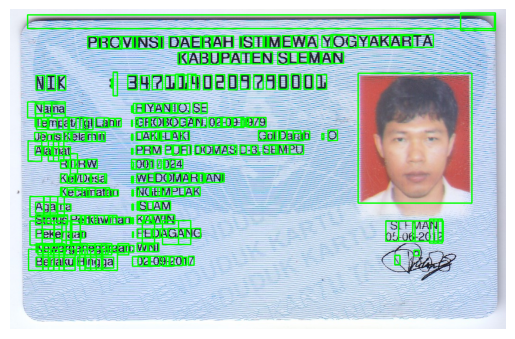

In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Baca gambar dari file
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/image_thres/ktp.png')

# Langkah 1: Prapemrosesan gambar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Peningkatan kontras
alpha = 1.5  # Sesuaikan nilai alpha sesuai kebutuhan
beta = 0     # Sesuaikan nilai beta sesuai kebutuhan
enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

# Langkah 2: Deteksi teks pada gambar
custom_config = r'--oem 3 --psm 6'  # Sesuaikan konfigurasi OCR sesuai kebutuhan
detected_text = pytesseract.image_to_string(enhanced_image, config=custom_config)

# Langkah 3: Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
h, w = enhanced_image.shape
boxes = pytesseract.image_to_boxes(enhanced_image)
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Teks Hasil Pembacaan:
——————————
PROVINS! DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN 7
NIK  : 3471240209790001
Nama /RIYANTO. SE
Tempat/TgtLahir : GROBOGAN, 02-09-1979
Jens Kelamin :LAKILLAKI GolDarah :O ~~ oo.
Alamat : PRM PURI DOMAS D-3, SEMPU.
RTRW 2001 /024
KevDesa  : WEDOMARTANI oC
Kecamatan :NGEMPLAK '
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye
Kewarganegaraan: WNI >
Berlaku Hingga 02-09-2017 Ree



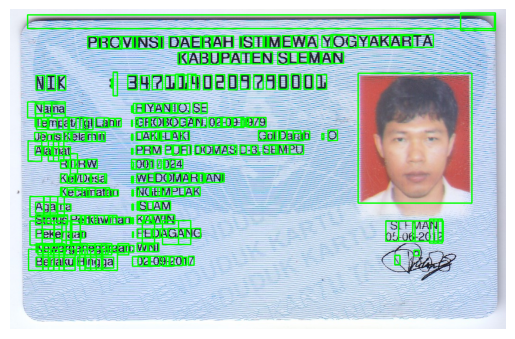

In [ ]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Baca gambar dari file
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/image_thres/ktp.png')

# Langkah 1: Prapemrosesan gambar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Peningkatan kontras
alpha = 1.5  # Sesuaikan nilai alpha sesuai kebutuhan
beta = 0     # Sesuaikan nilai beta sesuai kebutuhan
enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

# Langkah 2: Deteksi teks pada gambar
custom_config = r'--oem 3 --psm 6'  # Sesuaikan konfigurasi OCR sesuai kebutuhan
detected_text = pytesseract.image_to_string(enhanced_image, config=custom_config)

# Langkah 3: Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
h, w = enhanced_image.shape
boxes = pytesseract.image_to_boxes(enhanced_image)
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
